## Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_transformer

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor

import random


In [2]:
np.random.seed(13)

In [3]:
env = pd.read_csv('../data/cleaned_ejscreen.csv', index_col = ['Unnamed: 0'])
train = pd.read_csv('../data/train_cleaned_imputed.csv', index_col = ['Unnamed: 0'])
val = pd.read_csv('../data/val_cleaned_imputed.csv', index_col = ['Unnamed: 0'])

The data was split between train and test for X. The y variables included the target variable, cancer.

In [4]:
y_train = train['cancer']
y_val = val['cancer']
X_train = train.drop(columns = ['cancer', 'st_name', 'st_abbrev', 'shape_length', 'shape_area'])
X_val = val.drop(columns = ['cancer', 'st_name', 'st_abbrev', 'shape_length', 'shape_area'])

In [5]:
X_train

,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,pop,...,pre_1960_pct,diesel_pm,resp_index,traffic_prox,npl_prox,rmp_prox,waste_prox,ozone,pm_25,undgrd_stor
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1993.0,...,0.179310,0.175377,0.5,35.919960,0.066752,0.077960,0.500305,37.010497,9.152519,0.412039
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1959.0,...,0.197619,0.193126,0.5,159.744710,0.072665,0.082735,0.818620,37.038957,9.183280,2.461319
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10596.0,...,0.000000,0.301774,0.5,220.210382,0.093815,0.090465,1.082545,37.123515,9.242796,2.222632
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3668.0,...,0.077994,0.195934,0.6,259.619080,0.084657,0.109214,0.629107,37.053841,9.169609,1.536412
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2527.0,...,0.125966,0.093180,0.5,4.616101,0.024373,0.214272,0.039555,36.647373,8.861050,0.023569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73994,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3896.0,...,0.049822,0.017346,0.2,52.118846,0.056337,0.941757,3.441846,34.548454,6.615363,0.000000
73995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2905.0,...,0.168224,0.019568,0.2,628.068823,0.062411,1.279270,2.415616,34.271760,6.431964,6.885760
73996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6113.0,...,0.008955,0.019051,0.2,124.806305,0.056280,0.726861,1.591806,34.673908,6.516401,0.000000
73997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2388.0,...,0.058632,0.020953,0.2,980.891997,0.058924,0.850649,1.486320,36.420725,6.814729,0.000000


In [6]:
X_val

,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,pop,...,pre_1960_pct,diesel_pm,resp_index,traffic_prox,npl_prox,rmp_prox,waste_prox,ozone,pm_25,undgrd_stor
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3507.0,...,0.059524,0.224637,0.5,169.977159,0.075655,0.082532,1.299859,37.069151,9.207049,1.987063
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3878.0,...,0.112721,0.270230,0.5,500.544361,0.084317,0.087633,2.056273,37.087437,9.231752,3.362111
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3586.0,...,0.067845,0.233105,0.6,296.979644,0.102866,0.114030,1.556946,37.115158,9.223953,1.676221
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3196.0,...,0.064590,0.147923,0.5,26.555117,0.065579,0.133369,0.166820,36.916234,9.081288,0.112757
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11142.0,...,0.037439,0.155188,0.5,154.358653,0.052522,0.065001,0.210598,36.919522,9.091731,0.323415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5083.0,...,0.034151,0.016408,0.2,22.323445,0.039304,0.439392,0.078719,34.824629,6.316954,0.000000
73977,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1679.0,...,0.138028,0.014011,0.2,74.419880,0.039345,0.280571,0.074537,36.801449,6.853247,0.000000
73978,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2775.0,...,0.198540,0.017406,0.2,25.012447,0.045491,0.468922,0.101837,36.265901,6.884414,0.000000
73998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2126.0,...,0.100000,0.017332,0.2,247.918471,0.056189,0.585214,0.961161,36.428793,6.562776,0.000000


## Modeling

### Baseline Model

The y_train mean was 28.635

In [20]:
y_train.mean()

28.484574495359528

The baseline mean was filled with the entire y_val dataset to be used as a baseline model. The r2 score was calculated and it was 0.

In [25]:
pred_base = np.full(y_val.shape, y_train.mean())

In [27]:
round(r2_score(y_val,pred_base))

0

### Modeling with Demographic and Enviromental Features

For the modeling section, it was split between two comparisions, one in which we included the demographic and environmental features and then another modeling section with same models looking at only the environmental features. 

### Linear Regression

For the linear regression, As shown from the graph below, the cancer data is really right skewed and not resembing a normal distribution. A logarithmic was performed on both y train and the y val to try and normalize the distribution a little more. 

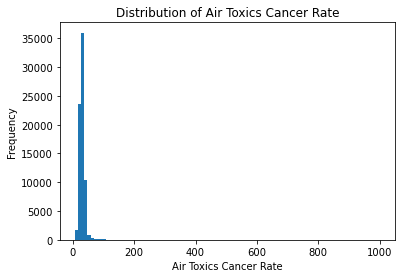

In [108]:
plt.hist(env['cancer'], bins = 100)
plt.title('Distribution of Air Toxics Cancer Rate')
plt.xlabel('Air Toxics Cancer Rate')
plt.ylabel('Frequency');

In [109]:
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

A histogram was made to see the new distrubtion for both X_train and y_val.

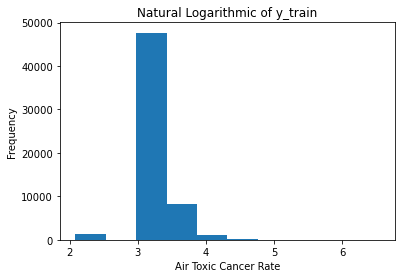

In [110]:
plt.hist(y_train_log)
plt.xlabel('Air Toxic Cancer Rate')
plt.ylabel('Frequency')
plt.title('Natural Logarithmic of y_train');

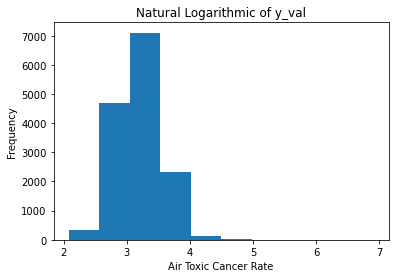

In [111]:
plt.hist(y_val_log)
plt.xlabel('Air Toxic Cancer Rate')
plt.ylabel('Frequency')
plt.title('Natural Logarithmic of y_val');

A gridsearch with pipeline was made for the linear regression model. In the pipeline, we included polynomial features, standard scaler, and Linear Regression. In the parameters, the degree for the polynomial features was 2. Multiple Degree numbers were tested. Degree = 2 provided the best results. Then a gridsearch was conducted with the pipeline and parameters.

In [112]:
lin_pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('lr', LinearRegression())
])

lin_params = [
    {
     'poly__degree':[2]   
    }
]

lr_gs = GridSearchCV(lin_pipe, param_grid = lin_params ,verbose = 0, n_jobs = -1)
lr_gs.fit(X_train, y_train_log)

GridSearchCV(estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ss', StandardScaler()),
                                       ('lr', LinearRegression())]),
             n_jobs=-1, param_grid=[{'poly__degree': [2]}])

After the gridsearch, predictions were made using linear regression for the X_train and X_val.

In [113]:
linear_train_preds = lr_gs.predict(X_train)
linear_val_preds = lr_gs.predict(X_val)

The R squared values for both the train and test scores, came to be around 0.7, the tests show no overfitting or underfitting. Next, we looked at the RMSE and saw train score being 7.13 and test score of 10.98. 

In [114]:
print('Linear Regression Train R squared:', lr_gs.score(X_train, y_train_log))
print('Linear Regression Validation R squared:', lr_gs.score(X_val, y_val_log))

print('\n')

print('LinearRegression Train RMSE:', mean_squared_error(y_train, np.exp(linear_train_preds), squared = False))
print('LinearRegression Validation RMSE:', mean_squared_error(y_val, np.exp(linear_val_preds), squared = False))

Linear Regression Train R squared: 0.7068455225817258
Linear Regression Validation R squared: 0.7034093263692789


LinearRegression Train RMSE: 7.134959453380073
LinearRegression Validation RMSE: 10.982586939394714


A plot was plotted to look at the residuals. This plot looks at the observed values between the fitted values. The data points were found to between -100 to 700. 

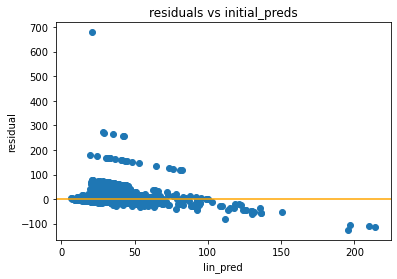

In [115]:
residuals = y_train - np.exp(linear_train_preds)
plt.title('residuals vs initial_preds')
plt.xlabel('lin_pred')
plt.ylabel('residual')
plt.scatter(np.exp(linear_train_preds), residuals);
plt.axhline(residuals.mean(), color = 'orange');

### Linear Regression with Regularization

After conducting a linear regression, A lasso regularization was done. Another gridsearch was done in which the pipeline had : standard Scaler, polynomial features, and then lasso. The polynomial feature was chosen to degree of 2, to be consistent with linear regression, but also had the best results when it came to r squared values. In the paramters for lasso, alpha was provided with multiple values. a best parameter was done to find the optimal alpha which was 0.001 and best score of 0.5254. 

In [116]:
lasso_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree = 2)),
    ('ss', StandardScaler()),
    ('model', Lasso())
])
lasso_params = [
    {
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
]

lasso_gs = GridSearchCV(lasso_pipe, param_grid = lasso_params,verbose = 0, n_jobs = -1)
lasso_gs.fit(X_train, y_train_log)

GridSearchCV(estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ss', StandardScaler()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid=[{'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100,
                                           1000]}])

In [117]:
lasso_train_preds = lasso_gs.predict(X_train)
lasso_val_preds = lasso_gs.predict(X_val)
actual_values = y_val
print(lasso_gs.best_params_)
print(lasso_gs.best_score_)

{'model__alpha': 0.001}
0.5254063111411031


The R squared value for training set for lasso was 0.6808 and the validation score was 0.677. The scores are lower than linear regression. But we see no overfitting in the model. The RMSE for the training set was 7.27 and the testing set was 11.15. The RMSE is higher compared to the Linear Regression model. 

In [118]:
print('Lasso Train R squared:', lasso_gs.score(X_train, y_train_log))
print('Lasso Validation R squared:', lasso_gs.score(X_val, y_val_log))

print('\n')

print('Lasso Train RMSE:', mean_squared_error(y_train, np.exp(lasso_train_preds), squared = False))
print('Lasso Validation RMSE:', mean_squared_error(y_val, np.exp(lasso_val_preds), squared = False))

Lasso Train R squared: 0.6808206446469416
Lasso Validation R squared: 0.677240709567018


Lasso Train RMSE: 7.274003805608064
Lasso Validation RMSE: 11.157543643339187


The plot below looks at the lasso predicted values and the actual values. As we can see there are larger number of points accumuated near the 0-80 for the predicted values.

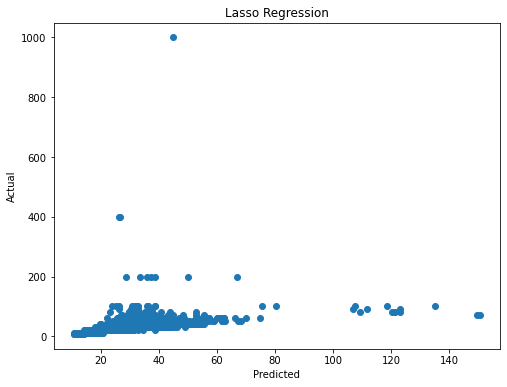

In [119]:
plt.figure(figsize=(8,6))
plt.scatter(np.exp(lasso_val_preds), actual_values)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Lasso Regression');

### Ridge Model

A ridge regression was done. Another gridsearch was done in which the pipeline had : standard scaler, polynomial features, and ridge. The polynomial feature was chosen to degree of 2, to be consistent with linear regression, but also had the best results when it came to R squared values. In the paramters for ridge, alpha was provided with multiple values. a best parameter was done to find the optimal alpha which was 3430.469 and best score of 0.5714. 

In [120]:
ridge_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree = 2)),
    ('ss', StandardScaler()),
    ('model', Ridge()),
])

ridge_params = [{
    'model__alpha': np.logspace(0, 5, 100, 1000)
}]

ridge_gs = GridSearchCV(ridge_pipe, param_grid = ridge_params, cv = 10, n_jobs = -1)

ridge_gs.fit(X_train, y_train_log)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ss', StandardScaler()),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid=[{'model__alpha': array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.0370...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05])}])

In [121]:
ridge_train_preds = ridge_gs.predict(X_train)
ridge_val_preds = ridge_gs.predict(X_val)
actual_values = y_val
print(ridge_gs.best_params_)
print(ridge_gs.best_score_)

{'model__alpha': 3430.4692863149194}
0.5714663768779833


The R squared values for the training set for ridge was 0.68 and the val set was 0.675. The RMSE score for the training was 7.24 and the val score was 11.13.

In [122]:
print('Ridge Train R squared:', ridge_gs.score(X_train, y_train_log))
print('Ridge Validation R squared:', ridge_gs.score(X_val, y_val_log))

print('\n')

print('Ridge Train RMSE:', mean_squared_error(y_train, np.exp(ridge_train_preds), squared = False))
print('Ridge Validation RMSE:', mean_squared_error(y_val, np.exp(ridge_val_preds), squared = False))

Ridge Train R squared: 0.680786909058223
Ridge Validation R squared: 0.6754270740988404


Ridge Train RMSE: 7.240468513433397
Ridge Validation RMSE: 11.128208934953344


The plot below looks at the ridge predicted values and the actual values. As we can see there are larger number of points accumuated near the 0-60 for the predicted values.

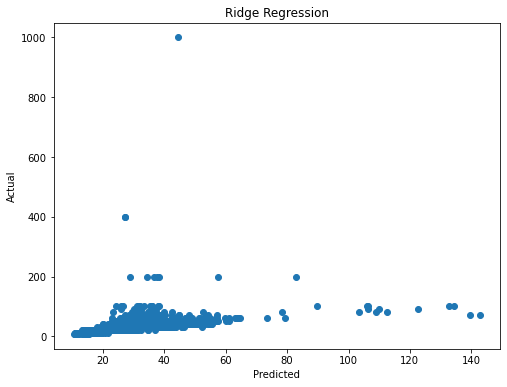

In [123]:
plt.figure(figsize=(8,6))
plt.scatter(np.exp(ridge_val_preds), actual_values)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ridge Regression');

### ElasticNet

An ElasticNet regression was done. Another gridsearch was done in which the pipeline had : standard scaler, polynomial features, and then elasticnet. The polynomial feature was chosen to degree of 2, to be consistent with linear regression, but also had the best results when it came to r squared values. In the paramters for elasticnet, alpha was provided with multiple values and then l1 ratio was included to be 0.1. The best parameter for alpha was 1, best l1 ratio 0.1 and the best score was 0.299. 

In [39]:
elast_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree = 2)),
    ('ss', StandardScaler()),
    ('enet', ElasticNet())
])

elast_params = {
    'enet__alpha': [1, 100, 1000],
    'enet__l1_ratio': [0.1],
    
}

elast_gs = GridSearchCV(elast_pipe, param_grid = elast_params, cv = 5, verbose = 1)
elast_gs.fit(X_train, y_train_log)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ss', StandardScaler()),
                                       ('enet', ElasticNet())]),
             param_grid={'enet__alpha': [1, 100, 1000],
                         'enet__l1_ratio': [0.1]},
             verbose=1)

In [40]:
elast_train_preds = elast_gs.predict(X_train)
elast_val_preds = elast_gs.predict(X_val)
actual_values = y_val
print(elast_gs.best_params_)
print(elast_gs.best_score_)

{'enet__alpha': 1, 'enet__l1_ratio': 0.1}
0.2990846669779248


The R squared values for the training set for elasticnet was 0.316 and the val set was 0.311. The RMSE score for the training was 8.769 and the val score was 12.37.

In [41]:
print('ElasticNet Train R squared:', elast_gs.score(X_train, y_train_log))
print('ElasticNet Validation R squared:', elast_gs.score(X_val, y_val_log))

print('\n')

print('ElasticNet Train RMSE:', mean_squared_error(y_train,np.exp(elast_train_preds), squared = False))
print('ElasticNet Validation RMSE:', mean_squared_error(y_val, np.exp(elast_val_preds), squared = False))

ElasticNet Train R squared: 0.31667054449835186
ElasticNet Validation R squared: 0.31089742552100275


ElasticNet Train RMSE: 8.769397208199793
ElasticNet Validation RMSE: 12.371205343683387


The plot below looks at the elasticnet predicted values and the actual values. As we can see there are larger number of points accumuated near the 0-50 for the predicted values.

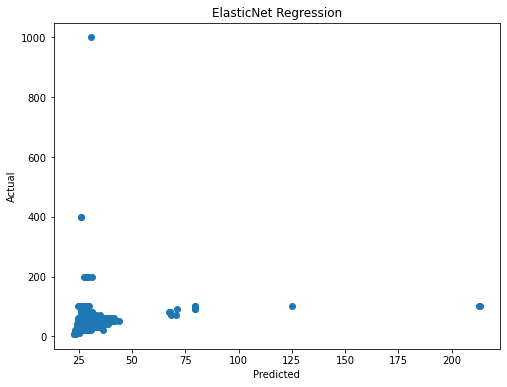

In [93]:
plt.figure(figsize=(8,6))
plt.scatter(np.exp(elast_val_preds), actual_values)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ElasticNet Regression');

After comparing all the four linear regressions and regularizations, Linear Regression did the best in R squared score. It had a high R Squared score at .7.

### K Nearest Neighbors

A pipeline and gridsearch was done for KNN Neighbor. the pipeline includes standardscaler and KNeighborregressor. The parameters for KNN were between 8,10, 12. The best parameters for KNN was 12. 

In [88]:
knn_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

knn_params = {
    'knn__n_neighbors': [8,10, 12]
}

knn_gs = GridSearchCV(knn_pipe, param_grid = knn_params)

knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [8, 10, 12]})

In [89]:
knn_train_preds = knn_gs.predict(X_train)
knn_val_preds = knn_gs.predict(X_val)
knn_gs.best_params_

{'knn__n_neighbors': 12}

The r^2 value for train was 0.625 and the val was 0.375. As we can see, the train did alright, but the val scored very low. This indicates that the model is overfitting. When looking at the RMSE for the train was 6.11 and the RMSE for the val was 10.45

In [58]:
print('KNN Train R squared:', knn_gs.score(X_train, y_train))
print('KNN Validation R squared:', knn_gs.score(X_val, y_val))

print('\n')

print('KNN Train RMSE:', mean_squared_error(y_train, knn_train_preds, squared = False))
print('KNN Validation RMSE:', mean_squared_error(y_val, knn_val_preds, squared = False))

KNN Train R squared: 0.6254313627109128
KNN Validation R squared: 0.3751825263294801


KNN Train RMSE: 6.1132026896893645
KNN Validation RMSE: 10.455960526780421


### Decision Tree

A decision tree was done, in which a random state was included to keep the results similar. Three paramters were looked at which include max_depth, max_features, and min_samples_split. The max depth looks at maximum depth of the tree. min_samples_split looks at the minimum number of splits to split a node. The max_features looks at number of features for best split. The best paramters that were found were 3 for max_depth, 0.65 for max_features, and 2 for min_samples_split

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [62]:
dt_pipe = Pipeline([
    ('dt', DecisionTreeRegressor(random_state = 13))
])

dt_params = {
    'dt__max_depth': [3, 5, 7, 10],
    'dt__max_features': [0.65, 0.75, 0.85, 1],
    'dt__min_samples_split': [2, 4, 5],
}

dt_gs = GridSearchCV(dt_pipe, param_grid = dt_params)

#fit model
dt_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('dt',
                                        DecisionTreeRegressor(random_state=13))]),
             param_grid={'dt__max_depth': [3, 5, 7, 10],
                         'dt__max_features': [0.65, 0.75, 0.85, 1],
                         'dt__min_samples_split': [2, 4, 5]})

In [64]:
#train model
dt_train_preds = dt_gs.predict(X_train)
dt_val_preds = dt_gs.predict(X_val)
#best params
dt_gs.best_params_

{'dt__max_depth': 3, 'dt__max_features': 0.65, 'dt__min_samples_split': 2}

The R squared value for the train was 0.4247 and for val was 0.2548. The scores are relatively low and we see some overfitting occuring due to the val score being lower than the training score. The RMSE for the train set was 7.57 and for the val set was 11.418 

In [65]:
#return metrics
print('Decision Tree Train R squared:', dt_gs.score(X_train, y_train))
print('Decision Tree Validation R squared:', dt_gs.score(X_val, y_val))

print('\n')

print('Decision Tree Train RMSE:', mean_squared_error(y_train, dt_train_preds, squared = False))
print('Decision Tree Validation RMSE:', mean_squared_error(y_val, dt_val_preds, squared = False))

Decision Tree Train R squared: 0.4247346814703339
Decision Tree Validation R squared: 0.25483951789373427


Decision Tree Train RMSE: 7.575951506694904
Decision Tree Validation RMSE: 11.418584214892437


### Bagging Regressor

To be consistent for each of the models, the random_state was put at 13. The parameters that were used for bagging regressor were n_estimators looks at the base estimators, max_samples looks at the number of samples to train for each estimator, and max features looks at number of featured to train for the base estimator. The best paramters were 0.75 for max_features, 0.75 for max_samples, and 15 for n_estimators. 

In [54]:
bag_pipe = Pipeline([
    ('bag', BaggingRegressor(random_state = 13))
])

bag_params = {
    'bag__n_estimators': [11,13,15],
    'bag__max_samples': [0.65, 0.75, 0.85],
    'bag__max_features': [0.65, 0.75, 0.85],
}

bag_gs = GridSearchCV(bag_pipe, param_grid = bag_params)

bag_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('bag',
                                        BaggingRegressor(random_state=13))]),
             param_grid={'bag__max_features': [0.65, 0.75, 0.85],
                         'bag__max_samples': [0.65, 0.75, 0.85],
                         'bag__n_estimators': [11, 13, 15]})

In [55]:
bag_train_preds = bag_gs.predict(X_train)
bag_val_preds = bag_gs.predict(X_val)
bag_gs.best_params_

{'bag__max_features': 0.65, 'bag__max_samples': 0.85, 'bag__n_estimators': 15}

The R squared value for train set was 0.91 and the val set was 0.47. This model had a high train score, but a low val score. This indicates the model is overfitting. The RMSE for the train was 2.85 and the val was 9.62 

In [56]:
print('Bag Train R squared:', bag_gs.score(X_train, y_train))
print('Bag Validation R squared:', bag_gs.score(X_val, y_val))

print('\n')

print('Bag Train RMSE:', mean_squared_error(y_train, bag_train_preds, squared = False))
print('Bag Validation RMSE:', mean_squared_error(y_val, bag_val_preds, squared = False))

Bag Train R squared: 0.9184257001740104
Bag Validation R squared: 0.4709290718648731


Bag Train RMSE: 2.852855451832009
Bag Validation RMSE: 9.621533600688716


### RandomForest

RandomForest was done with the parameters including: n_estimators which is the number of trees, max_depth is the maximum depth of trees, max_features is the number of features for the best split, and max_samples is the number of samples to train based of each estimator. The best paramters were 9 for max_depth, sqrt for max_features, 0.85 for max_samples, and 150 for n_estimators.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforest#sklearn.ensemble.RandomForestRegressor

In [93]:
rf_pipe = Pipeline([
    ('rf', RandomForestRegressor(random_state = 13))
])

rf_params = {
    'rf__n_estimators': [50, 75, 100, 150],
    'rf__max_depth': [5, 7, 9],
    'rf__max_features': ['sqrt', 1],
    'rf__max_samples': [0.65, 0.75, 0.85],
}

rf_gs = GridSearchCV(rf_pipe, param_grid = rf_params)

rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('rf',
                                        RandomForestRegressor(random_state=13))]),
             param_grid={'rf__max_depth': [5, 7, 9],
                         'rf__max_features': ['sqrt', 1],
                         'rf__max_samples': [0.65, 0.75, 0.85],
                         'rf__n_estimators': [50, 75, 100, 150]})

In [96]:
rf_train_preds = rf_gs.predict(X_train)
rf_val_preds = rf_gs.predict(X_val)
rf_gs.best_params_

{'rf__max_depth': 9,
 'rf__max_features': 'sqrt',
 'rf__max_samples': 0.85,
 'rf__n_estimators': 150}

The R squared for the train was 0.66 and for the val set it was 0.355. Based off of these scores, it can be seen that the model is overfitting. The RMSE for train was 5.82 and for the val it was 10.617. 

In [97]:
print('Random Forest Train R squared:', rf_gs.score(X_train, y_train))
print('Random Fores Validation R squared:', rf_gs.score(X_val, y_val))

print('\n')

print('Random Forest Train RMSE:', mean_squared_error(y_train, rf_train_preds, squared = False))
print('Random Forest Validation RMSE:', mean_squared_error(y_val, rf_val_preds, squared = False))

Random Forest Train R squared: 0.6604483364750824
Random Fores Validation R squared: 0.35576022582434996


Random Forest Train RMSE: 5.820442742101381
Random Forest Validation RMSE: 10.617227387897044


### AdaBoost

In the adaboost regressors the parameters used were n_estimators, learning_rate looks at providing a weight to each regressor after each iteration to boost it, random_state was kept at 13 for consistency, and then loss updates the weight after each boosting. The best parameters from adaboost were 0.75 for learning rate, loss was linear, and estimators was 25.

In [177]:
ada_pipe = Pipeline([
    ('ada', AdaBoostRegressor(random_state = 13))
])

ada_params = {
    'ada__n_estimators': [25, 50, 60],
    'ada__learning_rate': [0.75, 1, 1.25],
    'ada__loss': ['linear', 'square', 'exponential']
}

ada_gs = GridSearchCV(ada_pipe, param_grid = ada_params)

ada_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ada',
                                        AdaBoostRegressor(random_state=13))]),
             param_grid={'ada__learning_rate': [0.75, 1, 1.25],
                         'ada__loss': ['linear', 'square', 'exponential'],
                         'ada__n_estimators': [25, 50, 60],
                         'ada__random_state': [13]})

In [178]:
#best params
print(ada_gs.best_params_)

#train model
ada_train_preds = ada_gs.predict(X_train)
ada_val_preds = ada_gs.predict(X_val)

{'ada__learning_rate': 0.75, 'ada__loss': 'linear', 'ada__n_estimators': 25, 'ada__random_state': 13}


The R squared value for the train was 0.293 and the val score was 0.13. Both values were low when it came to the R squared values. The RMSE for train was 8.39 and for the val it was 12.315.

In [101]:
#return metrics
print('AdaBoostRegressor R squared:', ada_gs.score(X_train, y_train))
print('AdaBoostRegressor Validation R squared:', ada_gs.score(X_val, y_val))

print('\n')

print('AdaBoostRegressor Train RMSE:', mean_squared_error(y_train, ada_train_preds, squared = False))
print('AdaBoostRegressor Validation RMSE:', mean_squared_error(y_val, ada_val_preds, squared = False))

AdaBoostRegressor R squared: 0.29372144365749875
AdaBoostRegressor Validation R squared: 0.1332262552930642


AdaBoostRegressor Train RMSE: 8.39442784292361
AdaBoostRegressor Validation RMSE: 12.315164735620654


### Gradient Boost

In the Gradient boost regressors the parameters used were max_depth, n_estimators, learning_rate, and min_sample_splits. The best parameters were learning rate of 0.1, max_depth of 2, min_sample_splt of 2, and n_estimators 100.

In [102]:
gboost_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('g_boost', GradientBoostingRegressor(random_state = 13)),
])

gboost_params = {
    'g_boost__max_depth': [2,3],
    'g_boost__n_estimators' : [100, 250, 500],
    'g_boost__learning_rate' : [0.8, 1.0, 0.1],
    'g_boost__min_samples_split': [1, 2]
}

gb_gs = GridSearchCV(gboost_pipe, param_grid = gboost_params, cv = 3, verbose = 1)
gb_gs.fit(X_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 668, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Vishnu\ana

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('g_boost',
                                        GradientBoostingRegressor(random_state=13))]),
             param_grid={'g_boost__learning_rate': [0.8, 1.0, 0.1],
                         'g_boost__max_depth': [2, 3],
                         'g_boost__min_samples_split': [1, 2],
                         'g_boost__n_estimators': [100, 250, 500]},
             verbose=1)

In [103]:
gb_train_preds = gb_gs.predict(X_train)
gb_val_preds = gb_gs.predict(X_val)
print(gb_gs.best_params_)
print(gb_gs.best_score_)

0.5303459637929149
0.3135783806636132
{'g_boost__learning_rate': 0.1, 'g_boost__max_depth': 2, 'g_boost__min_samples_split': 2, 'g_boost__n_estimators': 100}
0.43037329533853974


The R squared value for the train was 0.538 and the val score was 0.313. There is some overfitting occuring in which the val is way lower than the train score by almost 0.2. The RMSE for train was 6.845 and for the val it was 10.959.

In [105]:
#return metrics
print('GradientBoostRegressor R squared:', gb_gs.score(X_train, y_train))
print('GradientBoostRegressor Validation R squared:', gb_gs.score(X_val, y_val))

print('\n')

print('GradientBoostRegressor Train RMSE:', mean_squared_error(y_train, gb_train_preds, squared = False))
print('GradientBoostRegressor Validation RMSE:', mean_squared_error(y_val, gb_val_preds, squared = False))

GradientBoostRegressor R squared: 0.5303459637929149
GradientBoostRegressor Validation R squared: 0.3135783806636132


GradientBoostRegressor Train RMSE: 6.845294221524877
GradientBoostRegressor Validation RMSE: 10.959300328618818


Discussion: After looking at each of the model's R Squared values, Linear Regression did the best with a high R squared score.

### Modeling with only Environmental Factors

Now this modeling section will look at only the environmental features. The demographic features were dropped from the X_train and X_val datasets

In [20]:
X_train.loc[:,'pre_1960_pct':]

,pre_1960_pct,diesel_pm,resp_index,traffic_prox,npl_prox,rmp_prox,waste_prox,ozone,pm_25,undgrd_stor
0,0.179310,0.175377,0.5,35.919960,0.066752,0.077960,0.500305,37.010497,9.152519,0.412039
1,0.197619,0.193126,0.5,159.744710,0.072665,0.082735,0.818620,37.038957,9.183280,2.461319
4,0.000000,0.301774,0.5,220.210382,0.093815,0.090465,1.082545,37.123515,9.242796,2.222632
5,0.077994,0.195934,0.6,259.619080,0.084657,0.109214,0.629107,37.053841,9.169609,1.536412
10,0.125966,0.093180,0.5,4.616101,0.024373,0.214272,0.039555,36.647373,8.861050,0.023569
...,...,...,...,...,...,...,...,...,...,...
73994,0.049822,0.017346,0.2,52.118846,0.056337,0.941757,3.441846,34.548454,6.615363,0.000000
73995,0.168224,0.019568,0.2,628.068823,0.062411,1.279270,2.415616,34.271760,6.431964,6.885760
73996,0.008955,0.019051,0.2,124.806305,0.056280,0.726861,1.591806,34.673908,6.516401,0.000000
73997,0.058632,0.020953,0.2,980.891997,0.058924,0.850649,1.486320,36.420725,6.814729,0.000000


In [21]:
X_env_train = X_train.loc[:,'pre_1960_pct':]
X_env_val = X_val.loc[:,'pre_1960_pct':]

### Linear Regression

A gridsearch with pipeline was made for the linear regression model. In the pipeline, we included polynomial features, standard scaler, and Linear Regression. In the parameters, the degree for the polynomial features was 2. Multiple Degree numbers were tested. Degree = 2 provided the best results. Then a gridsearch was conducted with the pipeline and parameters. The difference between the two models were the features that were included in the X_train and X_val. The best score for the linear regression model was 0.498

In [22]:
lin_pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('lr', LinearRegression())
])

lin_params = [
    {
     'poly__degree':[2]   
    }
]

lr_gs = GridSearchCV(lin_pipe, param_grid = lin_params ,verbose = 0, n_jobs = -1)
lr_gs.fit(X_env_train, y_train_log)

GridSearchCV(estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ss', StandardScaler()),
                                       ('lr', LinearRegression())]),
             n_jobs=-1, param_grid=[{'poly__degree': [2]}])

In [23]:
linenv_train_preds = lr_gs.predict(X_env_train)
linenv_val_preds = lr_gs.predict(X_env_val)
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'poly__degree': 2}
0.4981966793717939


When finding the R squared values for the train score was 0.63 and the test score was 0.63, the tests show no overfitting or underfitting. Next, we looked at the RMSE and saw train score being 7.72 and test score of 11.41. 

In [24]:
print('Linear Regression Train R squared:', lr_gs.score(X_env_train, y_train_log))
print('Linear Regression Validation R squared:', lr_gs.score(X_env_val, y_val_log))

print('\n')

print('LinearRegression Train RMSE:', mean_squared_error(y_train, np.exp(linenv_train_preds), squared = False))
print('LinearRegression Validation RMSE:', mean_squared_error(y_val, np.exp(linenv_val_preds), squared = False))

Linear Regression Train R squared: 0.6313016922990355
Linear Regression Validation R squared: 0.6320876466794915


LinearRegression Train RMSE: 7.7229407372666286
LinearRegression Validation RMSE: 11.418961225822649


A plot was plotted to look at the residuals. This plot looks at the observed values between the fitted values. The data points were found to between -100 to 700. 

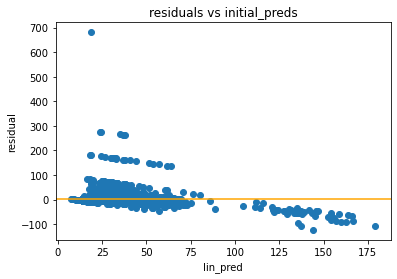

In [25]:
residuals = y_train - np.exp(linenv_train_preds)
plt.title('residuals vs initial_preds')
plt.xlabel('lin_pred')
plt.ylabel('residual')
plt.scatter(np.exp(linenv_train_preds), residuals);
plt.axhline(residuals.mean(), color = 'orange');

### Linear Regression with Regularization

After conducting a linear regression, A lasso regularization was done. Another gridsearch was done in which the pipeline had : standard Scaler, polynomial features, and then lasso. The polynomial feature was chosen to degree of 2, to be consistent with linear regression, but also had the best results when it came to r squared values. In the paramters for lasso, alpha was provided with multiple values. a best parameter was done to find the optimal alpha which was 0.001 and best score of 0.56724. 

In [27]:
lasso_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree = 2)),
    ('ss', StandardScaler()),
    ('model', Lasso())
])
lasso_params = [
    {
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
]

lasso_gs = GridSearchCV(lasso_pipe, param_grid = lasso_params,verbose = 0, n_jobs = -1)
lasso_gs.fit(X_env_train, y_train_log)

GridSearchCV(estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ss', StandardScaler()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid=[{'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100,
                                           1000]}])

In [28]:
lasso_train_preds = lasso_gs.predict(X_env_train)
lasso_val_preds = lasso_gs.predict(X_env_val)
actual_values = y_val
print(lasso_gs.best_params_)
print(lasso_gs.best_score_)

{'model__alpha': 0.001}
0.5672426003347777


When finding the r^2 values for the train score was 0.62 and the test score was 0.62, the tests show no overfitting or underfitting. Next, we looked at the RMSE and saw train score being 7.75 and test score of 11.48. 

In [29]:
print('Lasso Train R squared:', lasso_gs.score(X_env_train, y_train_log))
print('Lasso Validation R squared:', lasso_gs.score(X_env_val, y_val_log))

print('\n')

print('Lasso Train RMSE:', mean_squared_error(y_train, np.exp(lasso_train_preds), squared = False))
print('Lasso Validation RMSE:', mean_squared_error(y_val, np.exp(lasso_val_preds), squared = False))

Lasso Train R squared: 0.6241099604025764
Lasso Validation R squared: 0.6233454186993066


Lasso Train RMSE: 7.7504938148218985
Lasso Validation RMSE: 11.483124991409511


The plot below looks at the lasso predicted values and the actual values. As we can see there are larger number of points accumuated near the 0-80 for the predicted values. Then we see a small section of points around 140-160.

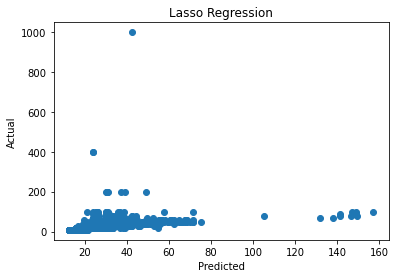

In [92]:
plt.scatter(np.exp(lasso_val_preds), actual_values)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Lasso Regression');

### Ridge Model

A ridge regression was done. Another gridsearch was done in which the pipeline had : standard Scaler, polynomial features, and then ridge. The polynomial feature was chosen to degree of 2, to be consistent with linear regression, but also had the best results when it came to r squared values. In the paramters for ridge, alpha was provided with multiple values. a best parameter was done to find the optimal alpha which was 335.160 and best score of 0.5647. 

In [31]:
ridge_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree = 2)),
    ('ss', StandardScaler()),
    ('model', Ridge()),
])

ridge_params = [{
    'model__alpha': np.logspace(0, 5, 100, 1000)
}]

ridge_gs = GridSearchCV(ridge_pipe, param_grid = ridge_params, cv = 10, n_jobs = -1)

ridge_gs.fit(X_env_train, y_train_log)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ss', StandardScaler()),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid=[{'model__alpha': array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.0370...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05])}])

In [32]:
ridge_train_preds = ridge_gs.predict(X_env_train)
ridge_val_preds = ridge_gs.predict(X_env_val)
actual_values = y_val
print(ridge_gs.best_params_)
print(ridge_gs.best_score_)

{'model__alpha': 335.1602650938841}
0.5647739735464051


When finding the R squared values for the train score was 0.628 and the test score was 0.628, the tests show no overfitting or underfitting. Next, we looked at the RMSE and saw train score being 7.75 and test score of 11.48. These were simialr results to Linear Regression and Lasso Regression. 

In [33]:
print('Ridge Train R squared:', ridge_gs.score(X_env_train, y_train_log))
print('Ridge Validation R squared:', ridge_gs.score(X_env_val, y_val_log))

print('\n')

print('Ridge Train RMSE:', mean_squared_error(y_train, np.exp(ridge_train_preds), squared = False))
print('Ridge Validation RMSE:', mean_squared_error(y_val, np.exp(ridge_val_preds), squared = False))

Ridge Train R squared: 0.6289026601080678
Ridge Validation R squared: 0.6285256525881038


Ridge Train RMSE: 7.758657891343572
Ridge Validation RMSE: 11.485078117670305


The plot below looks at the ridge predicted values and the actual values. As we can see there are larger number of points accumuated near the 0-60 for the predicted values. We have some traces of predicted values around the 125 to 175 as well.

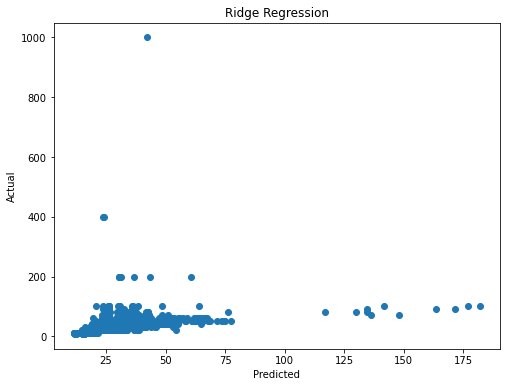

In [90]:
plt.figure(figsize=(8,6))
plt.scatter(np.exp(ridge_val_preds), actual_values)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ridge Regression');

### ElasticNet

An ElasticNet regression was done. Another gridsearch was done in which the pipeline had : standard Scaler, polynomial features, and then elasticnet. The polynomial feature was chosen to degree of 2, to be consistent with linear regression, but also had the best results when it came to r squared values. In the paramters for elasticnet, alpha was provided with multiple values and then l1 ration was included to be 0.1. a best parameter was done to find the optimal alpha which was 1, best l1 ratio 0.1 and the best score was 0.298. 

In [35]:
elast_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree = 2)),
    ('ss', StandardScaler()),
    ('enet', ElasticNet())
])

elast_params = {
    'enet__alpha': [1, 100, 1000],
    'enet__l1_ratio': [0.1],
    
}

elast_gs = GridSearchCV(elast_pipe, param_grid = elast_params, cv = 5, verbose = 1)
elast_gs.fit(X_env_train, y_train_log)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ss', StandardScaler()),
                                       ('enet', ElasticNet())]),
             param_grid={'enet__alpha': [1, 100, 1000],
                         'enet__l1_ratio': [0.1]},
             verbose=1)

In [36]:
elast_train_preds = elast_gs.predict(X_env_train)
elast_val_preds = elast_gs.predict(X_env_val)
actual_values = y_val
print(elast_gs.best_params_)
print(elast_gs.best_score_)

{'enet__alpha': 1, 'enet__l1_ratio': 0.1}
0.29902401137017215


When finding the R squared values for the train score was 0.31 and the test score was 0.31, the tests show no overfitting or underfitting. Next, we looked at the RMSE and saw train score being 8.77 and test score of 12.37. This model performed worse when it came to the R squared values and the RMSE of the linear regression models.

In [37]:
print('ElasticNet Train R squared:', elast_gs.score(X_env_train, y_train_log))
print('ElasticNet Validation R squared:', elast_gs.score(X_env_val, y_val_log))

print('\n')

print('ElasticNet Train RMSE:', mean_squared_error(y_train, np.exp(elast_train_preds), squared = False))
print('ElasticNet Validation RMSE:', mean_squared_error(y_val, np.exp(elast_val_preds), squared = False))

ElasticNet Train R squared: 0.3166702477608486
ElasticNet Validation R squared: 0.3108971413779703


ElasticNet Train RMSE: 8.76939857012767
ElasticNet Validation RMSE: 12.371206337722798


The plot below looks at the elasticnet predicted values and the actual values. As we can see there are larger number of points accumuated near the 0-50 for the predicted values and one point past 200 as well.

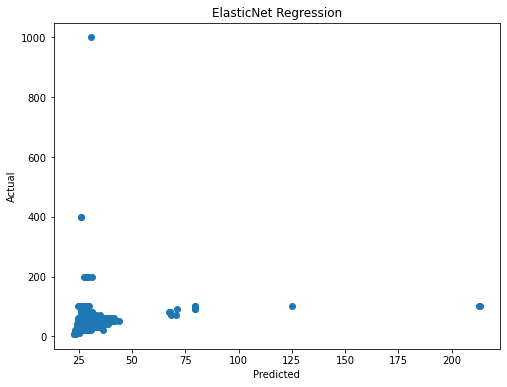

In [91]:
plt.figure(figsize=(8,6))
plt.scatter(np.exp(elast_val_preds), actual_values)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ElasticNet Regression');

Whem comparing the linear regression models and each of the regluarization, It can be seen that Linear regression, Lasso, and Ridge had similar results, but Linear Regression did slightly better.

### K Nearest Neighbor

A pipeline and gridsearch was done for KNN Neighbor. the pipeline inlcudes StandardScaler and KNeighborregressor. The paramters for KNN were between 8,10, 12. The best param that was found for the KNN was 12. 

In [126]:
knn_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

knn_params = {
    'knn__n_neighbors': [8,10, 12]
}

knn_gs = GridSearchCV(knn_pipe, param_grid = knn_params)

knn_gs.fit(X_env_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [8, 10, 12]})

In [127]:
knn_train_preds = knn_gs.predict(X_env_train)
knn_val_preds = knn_gs.predict(X_env_val)
knn_gs.best_params_

{'knn__n_neighbors': 12}

When finding the R squared values for the train score was 0.62 and the test score was 0.37, the tests shows signs of overfitting. Next, we looked at the RMSE and saw train score being 6.118 and test score of 10.49. 

In [128]:
print('KNN Train R squared:', knn_gs.score(X_env_train, y_train))
print('KNN Validation R squared:', knn_gs.score(X_env_val, y_val))

print('\n')

print('KNN Train RMSE:', mean_squared_error(y_train, knn_train_preds, squared = False))
print('KNN Validation RMSE:', mean_squared_error(y_val, knn_val_preds, squared = False))

KNN Train R squared: 0.6247927629909882
KNN Validation R squared: 0.3713421820052467


KNN Train RMSE: 6.118411650911307
KNN Validation RMSE: 10.488044277956329


### Decision Tree

A decision tree was done, in which a random state was included to keep the results similar. Three paramters were looked at which include max_depth, max_features, and min_samples_split. The max depth looks at maximum depth of the tree. min_samples_split looks at the minimum number of splits to split a node. The max_features looks at number of features for best split. The best paramters that were found were 5 for max_depth, 0.85 for max_features, and 2 for min_samples_split

In [129]:
dt_pipe = Pipeline([
    ('dt', DecisionTreeRegressor(random_state = 13))
])

dt_params = {
    'dt__max_depth': [3, 5, 7, 10],
    'dt__max_features': [0.65, 0.75, 0.85, 1],
    'dt__min_samples_split': [2, 4, 5],
}

dt_gs = GridSearchCV(dt_pipe, param_grid = dt_params)

#fit model
dt_gs.fit(X_env_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('dt',
                                        DecisionTreeRegressor(random_state=13))]),
             param_grid={'dt__max_depth': [3, 5, 7, 10],
                         'dt__max_features': [0.65, 0.75, 0.85, 1],
                         'dt__min_samples_split': [2, 4, 5]})

In [130]:
#train model
dt_train_preds = dt_gs.predict(X_env_train)
dt_val_preds = dt_gs.predict(X_env_val)
#best params
dt_gs.best_params_

{'dt__max_depth': 5, 'dt__max_features': 0.85, 'dt__min_samples_split': 2}

When finding the R squared values for the train score was 0.459 and the test score was 0.26, the tests shows signs of overfitting. Next, we looked at the RMSE and saw train score being 7.3427 and test score of 11.383. 

In [131]:
#return metrics
print('Decision Tree Train R squared:', dt_gs.score(X_env_train, y_train))
print('Decision Tree Validation R squared:', dt_gs.score(X_env_val, y_val))

print('\n')

print('Decision Tree Train RMSE:', mean_squared_error(y_train, dt_train_preds, squared = False))
print('Decision Tree Validation RMSE:', mean_squared_error(y_val, dt_val_preds, squared = False))

Decision Tree Train R squared: 0.4596019287628853
Decision Tree Validation R squared: 0.2594564094421278


Decision Tree Train RMSE: 7.342771019461973
Decision Tree Validation RMSE: 11.38315541884443


### Bagging Regressor

The random_state was put at 13. The parameters that were used for bagging regressor were n_estimators looks at the base estimators, max_samples looks at the number of samples to train for each estimator, and max features looks at number of featured to train for the base estimator. The best paramters were 0.65 for max_features, 0.85 for max_samples, and 15 for n_estimators. 

In [139]:
bag_pipe = Pipeline([
    ('bag', BaggingRegressor(random_state = 13))
])

bag_params = {
    'bag__n_estimators': [11,13,15],
    'bag__max_samples': [0.65, 0.75, 0.85],
    'bag__max_features': [0.65, 0.75, 0.85],
}

bag_gs = GridSearchCV(bag_pipe, param_grid = bag_params)

bag_gs.fit(X_env_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('bag',
                                        BaggingRegressor(random_state=13))]),
             param_grid={'bag__max_features': [0.65, 0.75, 0.85],
                         'bag__max_samples': [0.65, 0.75, 0.85],
                         'bag__n_estimators': [11, 13, 15]})

In [140]:
bag_train_preds = bag_gs.predict(X_env_train)
bag_val_preds = bag_gs.predict(X_env_val)
bag_gs.best_params_

{'bag__max_features': 0.65, 'bag__max_samples': 0.85, 'bag__n_estimators': 15}

When finding the R squared values for the train score was 0.897 and the test score was 0.394, the tests shows signs of overfitting. Next, we looked at the RMSE and saw train score being 3.193 and test score of 10.296. 

In [141]:
print('Bag Train R squared:', bag_gs.score(X_env_train, y_train))
print('Bag Validation R squared:', bag_gs.score(X_env_val, y_val))

print('\n')

print('Bag Train RMSE:', mean_squared_error(y_train, bag_train_preds, squared = False))
print('Bag Validation RMSE:', mean_squared_error(y_val, bag_val_preds, squared = False))

Bag Train R squared: 0.8977651472285175
Bag Validation R squared: 0.39410993835499875


Bag Train RMSE: 3.1937622110946897
Bag Validation RMSE: 10.296372978950076


### RandomForest

RandomForest was done with the parameters including: n_estimators which is the number of trees, max_depth is the maximum depth of trees, max_features is the number of features for the best split, and max_samples is the number of samples to train based of each estimator. The best paramters were 7 for max_depth, sqrt for max_features, 0.65 for max_samples, and 150 for n_estimators

In [142]:
rf_pipe = Pipeline([
    ('rf', RandomForestRegressor(random_state = 13))
])

rf_params = {
    'rf__n_estimators': [50, 75, 100, 150],
    'rf__max_depth': [5, 7, 9],
    'rf__max_features': ['sqrt', 1],
    'rf__max_samples': [0.65, 0.75, 0.85],
}

rf_gs = GridSearchCV(rf_pipe, param_grid = rf_params)

rf_gs.fit(X_env_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('rf',
                                        RandomForestRegressor(random_state=13))]),
             param_grid={'rf__max_depth': [5, 7, 9],
                         'rf__max_features': ['sqrt', 1],
                         'rf__max_samples': [0.65, 0.75, 0.85],
                         'rf__n_estimators': [50, 75, 100, 150]})

In [143]:
rf_train_preds = rf_gs.predict(X_env_train)
rf_val_preds = rf_gs.predict(X_env_val)
rf_gs.best_params_

{'rf__max_depth': 7,
 'rf__max_features': 'sqrt',
 'rf__max_samples': 0.65,
 'rf__n_estimators': 150}

When finding the R squared values for the train score was 0.533 and the test score was 0.294, the tests shows signs of overfitting. Next, we looked at the RMSE and saw train score being 6.819 and test score of 11.096. 

In [144]:
print('Random Forest Train R squared:', rf_gs.score(X_env_train, y_train))
print('Random Fores Validation R squared:', rf_gs.score(X_env_val, y_val))

print('\n')

print('Random Forest Train RMSE:', mean_squared_error(y_train, rf_train_preds, squared = False))
print('Random Forest Validation RMSE:', mean_squared_error(y_val, rf_val_preds, squared = False))

Random Forest Train R squared: 0.5339457472643556
Random Fores Validation R squared: 0.29624382558473894


Random Forest Train RMSE: 6.819010005018583
Random Forest Validation RMSE: 11.096817940201568


### AdaBoost

In the adaboost regressors the parameters used were n_estimators, learning_rate looks at providing a weight to each regressor after each iteration to boost it, random_state was kept at 13 for consistency, and then loss updates the weight after each boosting. The best parameters from adaboost were 1.25 for learning rate, loss was square, and estimators was 25.

In [75]:
ada_pipe = Pipeline([
    ('ada', AdaBoostRegressor(random_state = 13))
])

ada_params = {
    'ada__n_estimators': [25, 50, 60],
    'ada__learning_rate': [0.75, 1, 1.25],
    'ada__random_state': [13],
    'ada__loss': ['linear', 'square', 'exponential']
}

ada_gs = GridSearchCV(ada_pipe, param_grid = ada_params)

ada_gs.fit(X_env_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ada',
                                        AdaBoostRegressor(random_state=13))]),
             param_grid={'ada__learning_rate': [0.75, 1, 1.25],
                         'ada__loss': ['linear', 'square', 'exponential'],
                         'ada__n_estimators': [25, 50, 60],
                         'ada__random_state': [13]})

In [76]:
#best params
print(ada_gs.best_params_)

#train model
ada_train_preds = ada_gs.predict(X_env_train)
ada_val_preds = ada_gs.predict(X_env_val)

{'ada__learning_rate': 1.25, 'ada__loss': 'square', 'ada__n_estimators': 25, 'ada__random_state': 13}


When finding the R squared values for the train score was 0.0128 and the test score was -0.0017, the tests shows signs of overfitting. Next, we looked at the RMSE and saw train score being 9.924 and test score of 13.229. 

In [77]:
#return metrics
print('AdaBoostRegressor R squared:', ada_gs.score(X_env_train, y_train))
print('AdaBoostRegressor Validation R squared:', ada_gs.score(X_env_val, y_val))

print('\n')

print('AdaBoostRegressor Train RMSE:', mean_squared_error(y_train, ada_train_preds, squared = False))
print('AdaBoostRegressor Validation RMSE:', mean_squared_error(y_val, ada_val_preds, squared = False))

AdaBoostRegressor R squared: 0.012816508190007347
AdaBoostRegressor Validation R squared: -0.00017691063963209963


AdaBoostRegressor Train RMSE: 9.924349088383087
AdaBoostRegressor Validation RMSE: 13.2289618498637


### Gradient Boost

In the Gradient boost regressors the parameters used were max_depth, n_estimators, learning_rate, and min_sample_splits. The best parameters were learning rate of 0.1, max_depth of 2, min_sample_splt of 2, and n_estimators 100.

In [151]:
gboost_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('g_boost', GradientBoostingRegressor(random_state = 13)),
])

gboost_params = {
    'g_boost__max_depth': [2,3],
    'g_boost__n_estimators' : [100, 250, 500],
    'g_boost__learning_rate' : [0.8, 1.0, 0.1],
    'g_boost__min_samples_split': [1, 2]
}

gb_gs = GridSearchCV(gboost_pipe, param_grid = gboost_params, cv = 3, verbose = 1)
gb_gs.fit(X_env_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Vishnu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 668, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Vishnu\ana

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('g_boost',
                                        GradientBoostingRegressor(random_state=13))]),
             param_grid={'g_boost__learning_rate': [0.8, 1.0, 0.1],
                         'g_boost__max_depth': [2, 3],
                         'g_boost__min_samples_split': [1, 2],
                         'g_boost__n_estimators': [100, 250, 500]},
             verbose=1)

In [152]:
print(gb_gs.score(X_env_train, y_train))
print(gb_gs.score(X_env_val, y_val))
print(gb_gs.best_params_)
print(gb_gs.best_score_)

0.4935729417211232
0.28530676324731996
{'g_boost__learning_rate': 0.1, 'g_boost__max_depth': 2, 'g_boost__min_samples_split': 2, 'g_boost__n_estimators': 100}
0.4071325108965822


In [153]:
gb_train_preds = gb_gs.predict(X_env_train)
gb_val_preds = gb_gs.predict(X_env_val)

When finding the R squared values for the train score was 0.4935 and the test score was 0.2853, the tests shows signs of overfitting. Next, we looked at the RMSE and saw train score being 7.1082 and test score of 11.182. 

In [154]:
#return metrics
print('GradientBoostRegressor R squared:', gb_gs.score(X_env_train, y_train))
print('GradientBoostRegressor Validation R squared:', gb_gs.score(X_env_val, y_val))

print('\n')

print('GradientBoostRegressor Train RMSE:', mean_squared_error(y_train, gb_train_preds, squared = False))
print('GradientBoostRegressor Validation RMSE:', mean_squared_error(y_val, gb_val_preds, squared = False))

GradientBoostRegressor R squared: 0.4935729417211232
GradientBoostRegressor Validation R squared: 0.28530676324731996


GradientBoostRegressor Train RMSE: 7.108231132594661
GradientBoostRegressor Validation RMSE: 11.182713228817217


Conclusion: When looking at all the models for the environmental only features, The best model when it comes to R Squared value  was linear regression in which it had a R squared value of 0.63. When comparing the demographic and environmental features to only environmental features, there was a higher R squared value in the demographic and environmetal feature categories. 